In [1]:
########################################
# Activity Prediction by Imbalance     #
# @author: A.Prof. Tran Van Lang, PhD  #
# File: usingImbalance_new.py          #
########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv

from visualLang import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier

from bayes_opt import BayesianOptimization

import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [2]:
path = 'data/BioassayDatasets/AID373red'
df_train = pd.read_csv( path + '_train.csv')
df_test  = pd.read_csv( path + '_test.csv' )

# Delete the missing values datapoint
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

print( 'Số lượng mẫu\n- Tập huấn luyện:',df_train.shape[0] )
print( '    Loại Inactive:',df_train['Outcome'].value_counts()[0] )
print( '    Loại Active  :',df_train['Outcome'].value_counts()[1] )
print( '- Tập kiểm chứng:',df_test.shape[0])
print( '    Loại Inactive:',df_test['Outcome'].value_counts()[0] )
print( '    Loại Active  :',df_test['Outcome'].value_counts()[1] )

# Chuyển đổi nhãn thành số nguyên
label_mapping = {'Inactive': 1, 'Active': 0}
df_train['Outcome'] = df_train['Outcome'].map(label_mapping)
df_test['Outcome'] = df_test['Outcome'].map(label_mapping)

# Rút gọn thuộc tính dùng ma trận tương quan để chọn đặc trưng
corr_matrix = df_train.drop('Outcome', axis=1).corr()
threshold = 0.75

corr_features = set()  
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

selected_features = set(df_train.columns) - corr_features
#corr_features.add('Outcome')
print( 'Thuộc tính loại bỏ:\n',corr_features )
print( '\nThuộc tính chọn :\n',selected_features )

df_train_cleaned = df_train.drop(columns=corr_features)
df_test_cleaned = df_test.drop(columns=corr_features)

# Tách các đặc trưng (features) và nhãn (labels) thành 2 phần
X_train = df_train_cleaned.drop(columns=['Outcome'])
y_train = df_train_cleaned['Outcome']

X_test = df_test_cleaned.drop(columns=['Outcome'])
y_test = df_test_cleaned['Outcome']

results = []
num_minority_samples = np.sum(y_train==0)
num_majority_samples = np.sum(y_train==1)

Số lượng mẫu
- Tập huấn luyện: 47831
    Loại Inactive: 47781
    Loại Active  : 50
- Tập kiểm chứng: 11957
    Loại Inactive: 11945
    Loại Active  : 12
Thuộc tính loại bỏ:
 {'HBD_03_HBD', 'NEG_02_HBD', 'WBN_EN_L_1.00', 'WBN_EN_H_0.50', 'WBN_EN_H_1.00', 'WBN_GC_H_1.00', 'WBN_LP_H_0.50', 'WBN_EN_L_0.50', 'WBN_GC_H_0.75', 'WBN_GC_L_0.50', 'WBN_LP_L_1.00', 'WBN_GC_H_0.50', 'WBN_EN_H_0.75', 'WBN_LP_L_0.75', 'WBN_EN_L_0.75', 'WBN_LP_H_0.75', 'WBN_GC_L_1.00', 'WBN_LP_H_1.00', 'WBN_LP_L_0.50'}

Thuộc tính chọn :
 {'NEG_06_HBA', 'NEG_03_NEG', 'POS_04_ARC', 'WBN_GC_L_0.75', 'ARC_06_ARC', 'ARC_03_HYP', 'NumRot', 'ARC_02_ARC', 'NEG_06_HBD', 'POS_05_POS', 'ARC_07_HYP', 'NEG_05_NEG', 'ARC_04_HYP', 'NEG_04_POS', 'NEG_07_HBA', 'HBD_05_HBD', 'NEG_07_HBD', 'POS_06_HYP', 'HYP_03_HYP', 'POS_03_ARC', 'POS_05_HYP', 'HBA_07_ARC', 'HBA_03_HYP', 'ARC_06_HYP', 'WBN_LP_H_0.25', 'HBD_06_HYP', 'NEG_01_HBD', 'BadGroup', 'POS_04_HBD', 'HYP_04_HYP', 'HBA_03_ARC', 'NEG_06_POS', 'POS_02_HYP', 'HBD_04_HBA', 'HBD_06_H

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.50      0.50      0.50     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9989127707618968
AUC: 0.9084589088879588


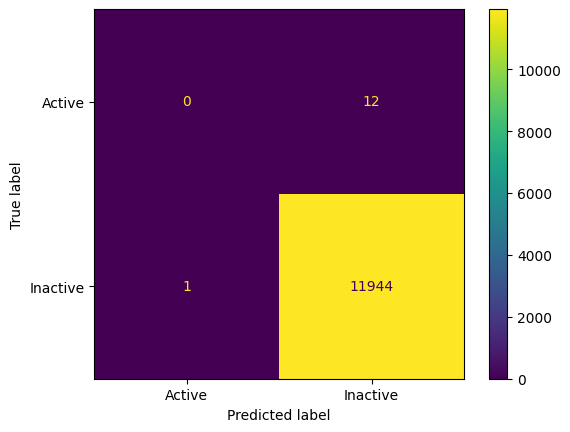

In [3]:
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

estimator,metric,npred = visualization('AdaBoost',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.50      0.50      0.50     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9978255415237935
AUC: 0.8067950327891726


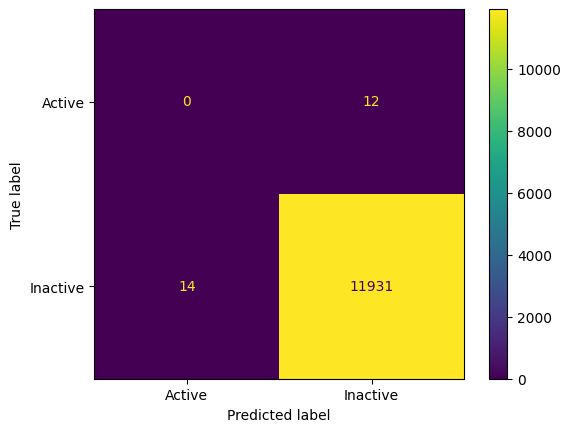

In [4]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Gradient Boosting',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.50      0.50      0.50     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9989964037802125
AUC: 0.8163771452490581


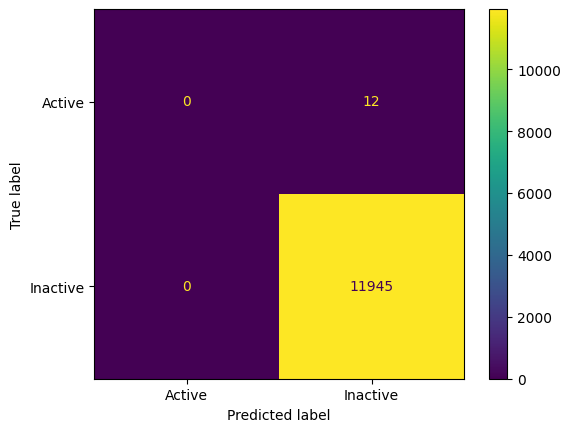

In [5]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Random Forest',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.58      0.01        12
           1       1.00      0.88      0.94     11945

    accuracy                           0.88     11957
   macro avg       0.50      0.73      0.47     11957
weighted avg       1.00      0.88      0.94     11957

Accuracy: 0.8807393158819101
AUC: 0.7557381052044091


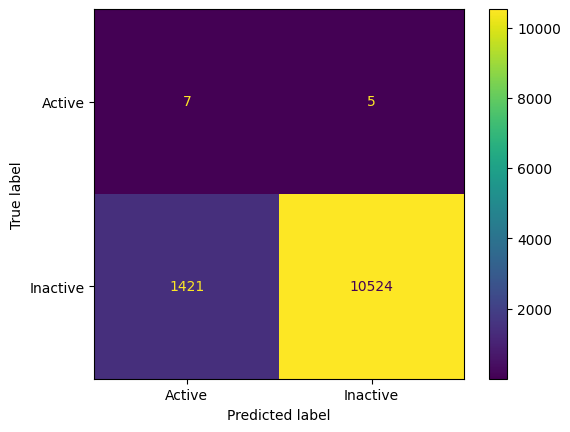

In [6]:
# Create an RUSBoost classifier
model = RUSBoostClassifier(random_state=42)
model.fit(X_train, y_train)

estimator,metric,npred = visualization('RUS Boost',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.92      0.01        12
           1       1.00      0.75      0.86     11945

    accuracy                           0.75     11957
   macro avg       0.50      0.84      0.43     11957
weighted avg       1.00      0.75      0.86     11957

Accuracy: 0.7537007610604667
AUC: 0.890930654388168


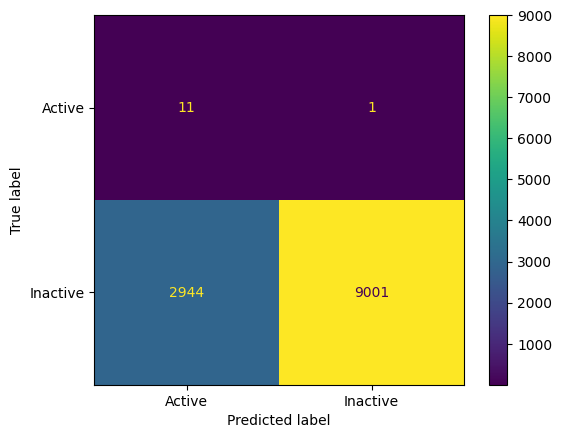

In [7]:
# Tạo mô hình EasyEnsemble với bộ phân loại cơ sở là Decision Tree
model = EasyEnsembleClassifier(n_estimators=10, random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Easy Ensemble',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.92      0.01        12
           1       1.00      0.77      0.87     11945

    accuracy                           0.77     11957
   macro avg       0.50      0.84      0.44     11957
weighted avg       1.00      0.77      0.87     11957

Accuracy: 0.7715145939616961
AUC: 0.8974466303892842


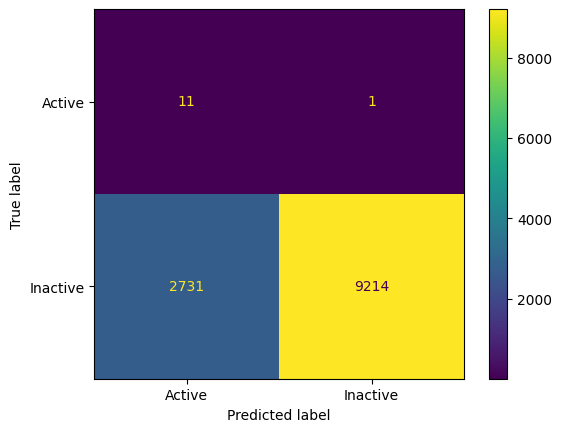

In [8]:
# Tạo mô hình EasyEnsemble với bộ phân loại cơ sở là Decision Tree
model = EasyEnsembleClassifier(n_estimators=10, random_state=42,n_jobs=-1, estimator=RandomForestClassifier())
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Easy Ensemble with Estimator RF',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.92      0.01        12
           1       1.00      0.73      0.85     11945

    accuracy                           0.74     11957
   macro avg       0.50      0.83      0.43     11957
weighted avg       1.00      0.74      0.85     11957

Accuracy: 0.735050597976081
AUC: 0.8844495604855588


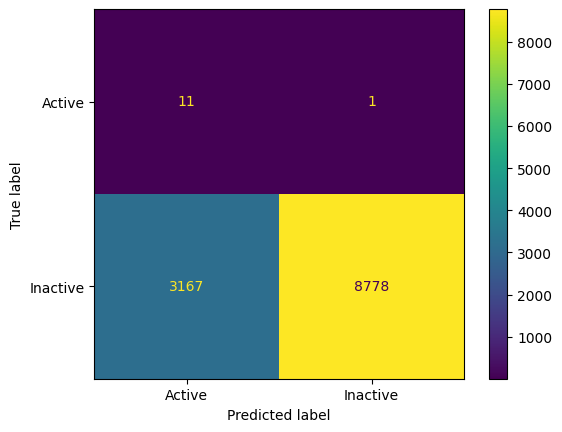

In [9]:
# Tạo mô hình EasyEnsemble với bộ phân loại cơ sở là Decision Tree
model = EasyEnsembleClassifier(n_estimators=10, random_state=42,n_jobs=-1, estimator=GradientBoostingClassifier())
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Easy Ensemble with Estimator GB',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.75      0.00        12
           1       1.00      0.42      0.60     11945

    accuracy                           0.42     11957
   macro avg       0.50      0.59      0.30     11957
weighted avg       1.00      0.42      0.60     11957

Accuracy: 0.42460483398845866
AUC: 0.6142807311287848


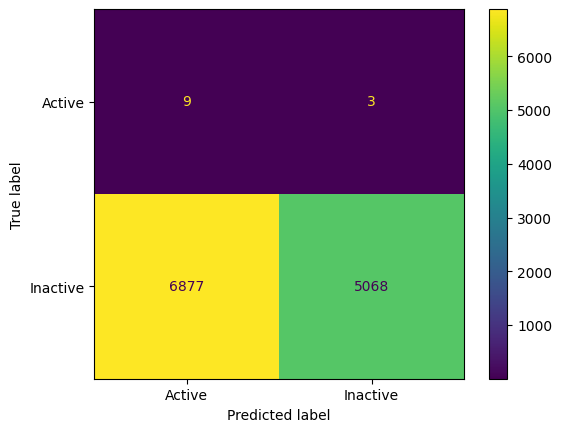

In [10]:
# Tạo mô hình EasyEnsemble với bộ phân loại cơ sở là Decision Tree
model = EasyEnsembleClassifier(n_estimators=10, random_state=42,n_jobs=-1, estimator=SVC())
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Easy Ensemble with Estimator SVM',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.50      0.50      0.50     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9989127707618968
AUC: 0.9084589088879588


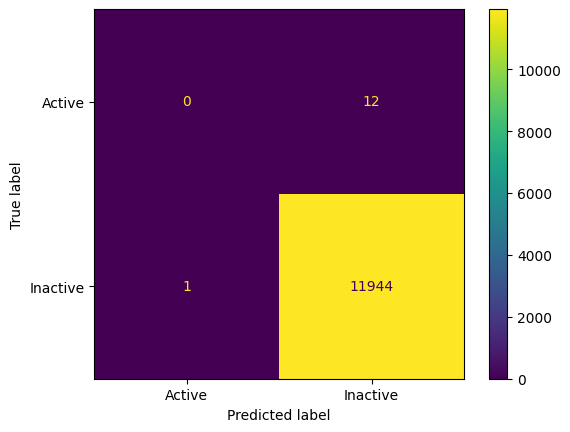

In [11]:
# Tạo mô hình EasyEnsemble với chiến lược lấy mẫu tất cả các lớp trừ lớp đa số
model = EasyEnsembleClassifier(n_estimators=10,random_state=42,n_jobs=-1,sampling_strategy='not majority')
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Easy Ensemble not majority',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.75      0.01        12
           1       1.00      0.70      0.83     11945

    accuracy                           0.70     11957
   macro avg       0.50      0.73      0.42     11957
weighted avg       1.00      0.70      0.82     11957

Accuracy: 0.7033536840344567
AUC: 0.8388691223664015


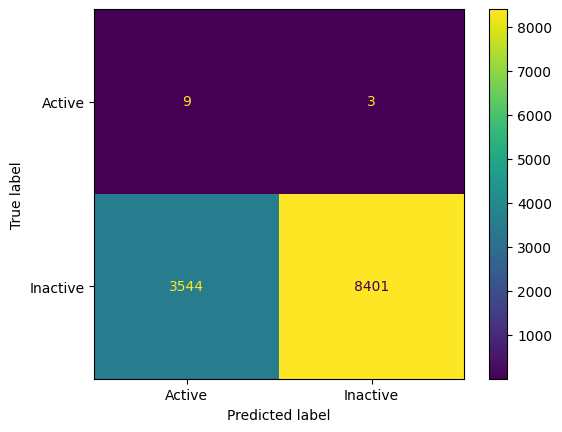

In [12]:
model = BalancedRandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1,replacement=True,sampling_strategy='auto')
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Random Forest',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.50      0.50      0.50     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9989964037802125
AUC: 0.7472896609460025


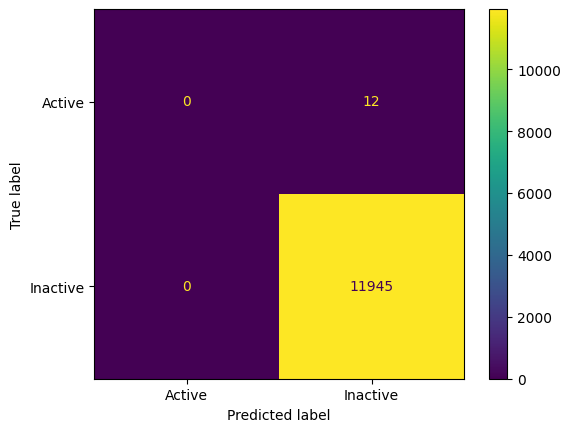

In [13]:
model = BalancedRandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1,replacement=True,sampling_strategy='not majority')
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Random Forest not majority',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.83      0.01        12
           1       1.00      0.75      0.86     11945

    accuracy                           0.75     11957
   macro avg       0.50      0.79      0.43     11957
weighted avg       1.00      0.75      0.86     11957

Accuracy: 0.754537091243623
AUC: 0.8666422491977117


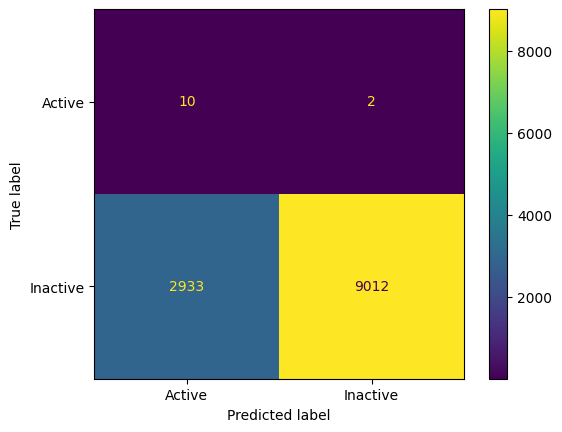

In [14]:
model = BalancedBaggingClassifier(n_estimators=10, random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Bagging',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.50      0.50      0.50     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9989964037802125
AUC: 0.8857820566485279


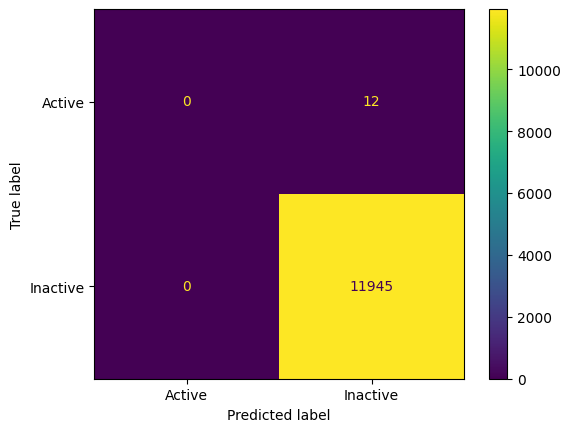

In [15]:
model = BalancedBaggingClassifier(n_estimators=10, random_state=42,n_jobs=-1,sampling_strategy='not majority',estimator=RandomForestClassifier())
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Bagging not majority with Estimator RF',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       0.50      0.50      0.50     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9989127707618968
AUC: 0.8419143295660668


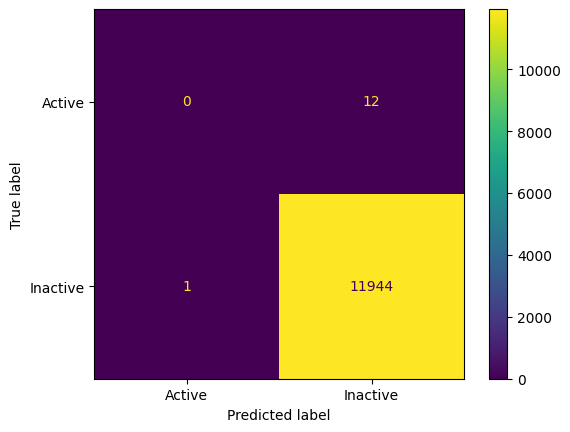

In [16]:
model = BalancedBaggingClassifier(n_estimators=10, random_state=42,n_jobs=-1,sampling_strategy='not majority',estimator=GradientBoostingClassifier())
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Bagging not majority with Estimator GD',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        12
           1       1.00      1.00      1.00     11945

    accuracy                           1.00     11957
   macro avg       1.00      0.58      0.64     11957
weighted avg       1.00      1.00      1.00     11957

Accuracy: 0.9991636698168437
AUC: 0.7054485837868006


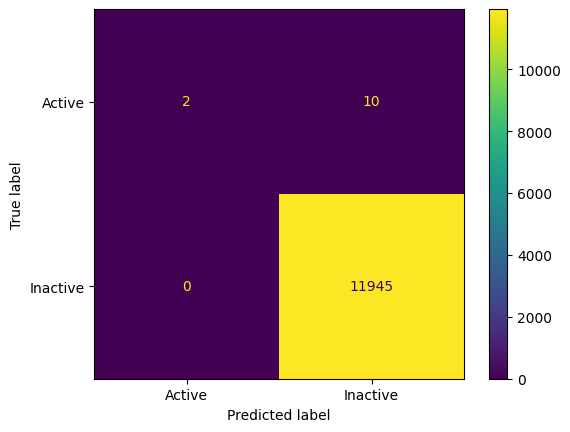

In [17]:
model = BalancedBaggingClassifier(n_estimators=10, random_state=42,n_jobs=-1,sampling_strategy='not majority')
model.fit(X_train, y_train)

estimator,metric,npred = visualization('Balanced Bagging not majority',model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

In [18]:
import csv
import os

filename = os.path.basename(path) + '_Imb'
with open(filename + '.csv', "w") as file:
    writer = csv.writer(file, delimiter=",")
    writer.writerow(['Phương pháp tiếp cận','Precision','G-mean','AUC','Accuracy','Recall','F1-score','Active: Đoán đúng','Active: Đoán nhầm','Inactive: Đoán đúng','Inactive: Đoán nhầm'])
    for row in results:
        writer.writerow(row)
file.close()

df = pd.read_csv(filename + '.csv')
df.to_excel(filename + '.xlsx', index=False)